In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.set_printoptions(suppress=True, precision=3)

# Show Graph

In [3]:
def ShowGraph(a, b, X, Y, line="a+bx"):
    line_x = np.arange(np.amin(X), np.amax(X), 0.01)
    if line == "a+bx":
        line_y = a + b * line_x
    elif line == "ax^b":
        line_y = a * line_x ** b
    elif line == "ae^(bx)":
        line_y = a * np.exp(b*line_x)

    plt.clf()
    plt.plot(line_x, line_y, '-r')
    plt.plot(X, Y, 'ob')
    plt.grid()
    plt.show()

# Error

## Least Square Error

In [4]:
def LeastSquareError(a, b, xi, yi):
    Dt = np.sum((yi - np.average(yi)) ** 2)
    D = np.sum((yi - a - b*xi) ** 2)
    
    r = ((Dt-D)/Dt) ** 0.5
    
    return r

## Correlation Coeficient

In [5]:
def CorrelationCoef(X, Y):
    difX = X - np.average(X)
    difY = Y - np.average(Y)
    
    r = (np.sum(difX*difY))/((np.sum((difX)**2)*np.sum((difY)**2))**(0.5))
    
    return r;

# Linear Regression &rarr; y = a + bx

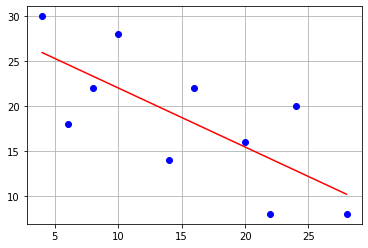

y = a + bx

a: 28.585106382978722
b: -0.6569148936170213
least suqare error: 0.7231812135292409


In [6]:
def LinearRegression(X_data, Y_data, showGraph=True, showData=True):
    if X_data.size != Y_data.size:
        print("banyak data X dan Y tidak sama!")
        exit()

    n = X_data.size
    data = pd.DataFrame({
        'xi': X_data,
        'yi': Y_data,
        'xiyi': X_data*Y_data,
        'xi2': X_data*X_data
    })

    x_bar = np.average(data['xi'])
    y_bar = np.average(data['yi'])

    b = (n * np.sum(data['xiyi']) - np.sum(data['xi']) *
         np.sum(data['yi']))/(n * np.sum(data['xi2']) - np.sum(data['xi'])**2)
    a = y_bar - b * x_bar

    if showGraph:
        ShowGraph(a, b, data['xi'], data['yi'])

    if showData:
        print("linear regression data")
        print(data)
        print()

    return [a, b]


X_data = np.array([4, 6, 8, 10, 14, 16, 20, 22, 24, 28])
Y_data = np.array([30, 18, 22, 28, 14, 22, 16, 8, 20, 8])

a, b = LinearRegression(X_data, Y_data, showGraph=True, showData=False)
print("y = a + bx\n")
print("a:", a)
print("b:", b)
print("least suqare error:", LeastSquareError(a, b, X_data, Y_data))

# Non-Linear Regression

## y = ax^b

linear regression data
         xi        yi      xiyi       xi2
0  0.000000 -0.301030 -0.000000  0.000000
1  0.301030  0.230449  0.069372  0.090619
2  0.477121  0.531479  0.253580  0.227645
3  0.602060  0.755875  0.455082  0.362476
4  0.698970  0.924279  0.646043  0.488559



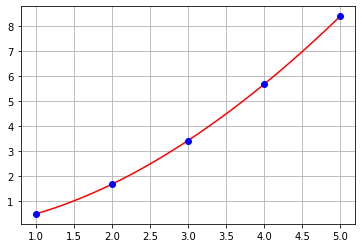

non-linear regression data (y = ax^b)
pi = log(xi)
qi = log(yi)
   xi   yi        pi        qi
0   1  0.5  0.000000 -0.301030
1   2  1.7  0.301030  0.230449
2   3  3.4  0.477121  0.531479
3   4  5.7  0.602060  0.755875
4   5  8.4  0.698970  0.924279

y = ax^b

a: 0.500933649097749
b: 1.75172364807736
least suqare error: 0.7436183127152611


In [7]:
def NonLinearRegression1(X_data, Y_data, showGraph=True, showData=True):
    if X_data.size != Y_data.size:
        print("banyak data X dan Y tidak sama!")
        exit()

    n = X_data.size
    data = pd.DataFrame({
        'xi': X_data,
        'yi': Y_data,
        'pi': np.log10(X_data),
        'qi': np.log10(Y_data)
    })

    a, b = LinearRegression(data['pi'], data['qi'],
                            showGraph=False, showData=showData)
    a = 10 ** a

    if showGraph:
        ShowGraph(a, b, X_data, Y_data, line="ax^b")

    if showData:
        print("non-linear regression data (y = ax^b)")
        print("pi = log(xi)")
        print("qi = log(yi)")
        print(data)
        print()

    return [a, b]


X_data = np.array([1, 2, 3, 4, 5])
Y_data = np.array([0.5, 1.7, 3.4, 5.7, 8.4])

a, b = NonLinearRegression1(X_data, Y_data, showGraph=True, showData=True)
print("y = ax^b\n")
print("a:", a)
print("b:", b)
print("least suqare error:", LeastSquareError(a, b, X_data, Y_data))

## y = ae^(bx)

linear regression data
   xi        yi       xiyi  xi2
0   1 -0.693147  -0.693147    1
1   2  0.530628   1.061257    4
2   3  1.223775   3.671326    9
3   4  1.740466   6.961865   16
4   5  2.128232  10.641159   25



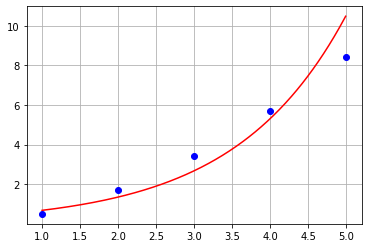

non-linear regression data (y = ae^(bx))
qi = log(yi)
   xi   yi  pi        qi
0   1  0.5   1 -0.693147
1   2  1.7   2  0.530628
2   3  3.4   3  1.223775
3   4  5.7   4  1.740466
4   5  8.4   5  2.128232

y = ae^(bx)

a: 0.34308130042789264
b: 0.6852595696596763
least suqare error: 0.5130828465854856


In [8]:
def NonLinearRegression2(X_data, Y_data, showGraph=True, showData=True):
    if X_data.size != Y_data.size:
        print("banyak data X dan Y tidak sama!")
        exit()

    n = X_data.size
    data = pd.DataFrame({
        'xi': X_data,
        'yi': Y_data,
        'pi': X_data,
        'qi': np.log(Y_data)
    })

    a, b = LinearRegression(data['pi'], data['qi'],
                            showGraph=False, showData=showData)
    a = np.exp(a)

    if showGraph:
        ShowGraph(a, b, X_data, Y_data, line="ae^(bx)")

    if showData:
        print("non-linear regression data (y = ae^(bx))")
        print("qi = log(yi)")
        print(data)
        print()

    return [a, b]


X_data = np.array([1, 2, 3, 4, 5])
Y_data = np.array([0.5, 1.7, 3.4, 5.7, 8.4])

a, b = NonLinearRegression2(X_data, Y_data, showGraph=True, showData=True)
print("y = ae^(bx)\n")
print("a:", a)
print("b:", b)
print("least suqare error:", LeastSquareError(a, b, X_data, Y_data))

# Polinomial Regression

In [9]:
def GaussJordan(A, B, printStep=False):
    size = B.size
    matrix = A
    matrix = np.concatenate((A, B.reshape(size, 1)), axis=1)
    
    for i in range(0, size):
        if printStep:
            print("step", i+1, "\n")
            
        matrix[i] /= matrix[i, i]

        for j in range(0, size):
            if i == j:
                continue
                
            matrix[j] -= matrix[i] * matrix[j, i]
            if printStep:
                print(matrix, "\n")
        
    return matrix

## Ordo 2

In [55]:
def CorrelationCoefPoli2(x, y, a0, a1, a2):
    # x y adalah data awal
    ya = a0 + a1*x + a2*(x**2)
    
    D = np.sum((y - ya)**2)
    Dt = np.sum((y - np.average(y))**2)
    r = np.sqrt((Dt-D)/Dt)
    
    table = pd.DataFrame({
        'x': x,
        'y': y,
        'x2': x**2,
        "y'": ya,
        "y - y'": y - ya,
        "(y - y')^2": (y - ya)**2,
        'y - ybar': y - np.average(y),
        '(y - ybar)^2': (y - np.average(y))**2
    })
    
    print("Dt (y-ybar)^2 :", Dt)
    print("D  (y-ya)^2   :", D)
    print(table)
    
    return r

In [25]:
def ShowGraphPoli2(X, Y, a0, a1, a2):
    # X Y (kapital) itu data awalnya yakk
    
    x = np.arange(np.amin(X), np.amax(X), 0.01) # ini tulis aja, susah jelasinnya :v
    y = a0 + a1*x + a2*(x**2)                   # ini garis f(x) nya

    plt.clf()              # ini buat clear plt yang sebelumnya, dihapus aja gpp kan cuma 1
    plt.plot(x, y, '-r')   # ini nampilin garis f(x) tadi. '-r' => - artine garis; r artine red => garis merah
    plt.plot(X, Y, 'ob')   # ini nampilin titik-titik data. 'ob' => o artine bulet2 (titik); b artine blue => titik2 biru
    plt.grid()             # ini biar ada background gridnya
    plt.show()             # ini buat menampilkan yang dibuat tadi

y avg 5.633333
       x          x2           x3            x4    y         xy         x2y
0   2.00    4.000000     8.000000     16.000000  7.2  14.400000   28.799999
1   4.25   18.062500    76.765625    326.253906  7.1  30.174999  128.243744
2   5.25   27.562500   144.703125    759.691406  6.0  31.500000  165.375000
3   7.81   60.996098   476.379517   3720.524170  5.0  39.049999  304.980499
4   9.20   84.639999   778.687927   7163.929199  3.5  32.200001  296.239990
5  10.60  112.360008  1191.016113  12624.771484  5.0  53.000000  561.800049 

6 | 39.11 | 307.6211 | 2675.5522 | 24611.17 | 33.8 | 200.325 | 1485.4393 | 

step 1 

[[    1.        6.518    51.27      5.633]
 [    0.       52.689   670.375   -19.995]
 [  307.621  2675.552 24611.17   1485.439]] 

[[   1.       6.518   51.27     5.633]
 [   0.      52.689  670.375  -19.995]
 [   0.     670.375 8839.38  -247.493]] 

step 2 

[[   1.       0.     -31.664    8.107]
 [   0.       1.      12.723   -0.379]
 [   0.     670.375 8839.3

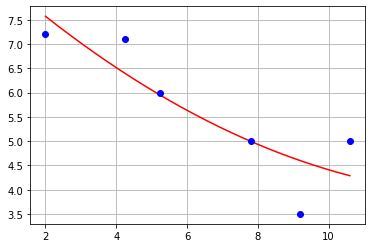

In [54]:
X = np.array([2, 4.25, 5.25, 7.81, 9.2, 10.6], dtype="float32")
Y = np.array([7.2, 7.1, 6, 5, 3.5, 5], dtype="float32")

# orde 2
n = X.size

x = np.sum(X)
y = np.sum(Y)
xy = np.sum(X*Y)
x2y = np.sum((X**2)*Y)
x2 = np.sum(X**2)
x3 = np.sum(X**3)
x4 = np.sum(X**4)

table = pd.DataFrame({
    'x': X,
    'x2': X**2,
    'x3': X**3,
    'x4': X**4,
    'y': Y,
    'xy': X*Y,
    'x2y': (X**2)*Y
})

print("y avg", np.average(Y))

print(table, '\n')
print(n, x, x2, x3, x4, y, xy, x2y, '\n', sep=" | ")


A = np.array([[n, x, x2],
              [x, x2, x3],
              [x2, x3, x4]], dtype="float32")

B = np.array([y, xy, x2y], dtype="float32")

resultMatrix = GaussJordan(A, B, printStep=True)
result = resultMatrix[:, -1]
a0, a1, a2 = result
print("\ny = a0 + a1x + a2x^2")
print("a0 =", a0)
print("a1 =", a1)
print("a2 =", a2)
print("\nKoefisien korelasi =", CorrelationCoefPoli2(X, Y, a0, a1, a2))

ShowGraphPoli2(X, Y, a0, a1, a2)

## Ordo 3

In [42]:
def CorrelationCoefPoli3(x, y, a0, a1, a2, a3):
    # x y adalah data awal
    ya = a0 + a1*x + a2*(x**2) + a3*(x**3)
    
    D = np.sum((y - ya)**2)
    Dt = np.sum((y - np.average(y))**2)
    r = np.sqrt(((Dt-D)/Dt))
    
    return r

In [43]:
def ShowGraphPoli3(X, Y, a0, a1, a2, a3):
    # X Y (kapital) itu data awalnya yakk
    
    x = np.arange(np.amin(X), np.amax(X), 0.01) # ini tulis aja, susah jelasinnya :v
    y = a0 + a1*x + a2*(x**2) + a3*(x**3)       # ini garis f(x) nya

    plt.clf()              # ini buat clear plt yang sebelumnya, dihapus aja gpp kan cuma 1
    plt.plot(x, y, '-r')   # ini nampilin garis f(x) tadi. '-r' => - artine garis; r artine red => garis merah
    plt.plot(X, Y, 'ob')   # ini nampilin titik-titik data. 'ob' => o artine bulet2 (titik); b artine blue => titik2 biru
    plt.grid()             # ini biar ada background gridnya
    plt.show()             # ini buat menampilkan yang dibuat tadi

       x     x2       x3        x4         x5           x6     y         xy  \
0    1.0    1.0      1.0       1.0        1.0          1.0  0.90   0.900000   
1    2.0    4.0      8.0      16.0       32.0         64.0  1.42   2.840000   
2    3.0    9.0     27.0      81.0      243.0        729.0  1.30   3.900000   
3    4.0   16.0     64.0     256.0     1024.0       4096.0  1.55   6.200000   
4    5.0   25.0    125.0     625.0     3125.0      15625.0  1.63   8.150000   
5    6.0   36.0    216.0    1296.0     7776.0      46656.0  1.32   7.920000   
6    7.0   49.0    343.0    2401.0    16807.0     117649.0  1.35   9.450000   
7    8.0   64.0    512.0    4096.0    32768.0     262144.0  1.47  11.760000   
8    9.0   81.0    729.0    6561.0    59049.0     531441.0  1.95  17.550001   
9   10.0  100.0   1000.0   10000.0   100000.0    1000000.0  1.66  16.600000   
10  11.0  121.0   1331.0   14641.0   161051.0    1771561.0  1.96  21.560001   
11  12.0  144.0   1728.0   20736.0   248832.0    298

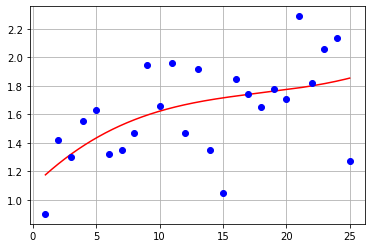

In [46]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
              11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
              21, 22, 23, 24, 25], dtype="float32")
Y = np.array([0.90, 1.42, 1.30, 1.55, 1.63, 1.32, 1.35,
              1.47, 1.95, 1.66, 1.96, 1.47, 1.92, 1.35,
              1.05, 1.85, 1.74, 1.65, 1.78, 1.71, 2.29,
              1.82, 2.06, 2.14, 1.27], dtype="float32")

# orde 3
n = X.size

x = np.sum(X)
y = np.sum(Y)
xy = np.sum(X*Y)
x2y = np.sum((X**2)*Y)
x3y = np.sum((X**3)*Y)
x2 = np.sum(X**2)
x3 = np.sum(X**3)
x4 = np.sum(X**4)
x5 = np.sum(X**5)
x6 = np.sum(X**6)

table = pd.DataFrame({
    'x': X,
    'x2': X**2,
    'x3': X**3,
    'x4': X**4,
    'x5': X**5,
    'x6': X**6,
    'y': Y,
    'xy': X*Y,
    'x2y': (X**2)*Y,
    'x3y': (X**3)*Y
})

print(table, '\n')
print(n, x, x2, x3, x4, x5, x6, y, xy, x2y, x3y, '\n', sep=" | ")


A = np.array([[n, x, x2, x3],
              [x, x2, x3, x4],
              [x2, x3, x4, x5],
              [x3, x4, x5, x6]], dtype="float32")

B = np.array([y, xy, x2y, x3y], dtype="float32")

resultMatrix = GaussJordan(A, B, printStep=True)
result = resultMatrix[:, -1]
a0, a1, a2, a3 = result
print("\ny = a0 + a1x + a2x^2 + a3x^3")
print("a0 =", a0)
print("a1 =", a1)
print("a2 =", a2)
print("a3 =", a3)
print("\nKoefisien korelasi =", CorrelationCoefPoli3(X, Y, a0, a1, a2, a3))

ShowGraphPoli3(X, Y, a0, a1, a2, a3)